In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [ ]:
data=pd.DataFrame(datasets.load_iris().data)
data.columns=datasets.load_iris().feature_names
data['class']=datasets.load_iris().target

In [ ]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
class_type=datasets.load_iris().target_names
class_type

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


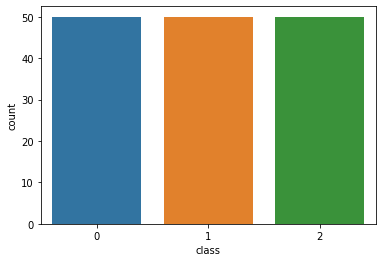

In [ ]:
sns.countplot(data['class'])

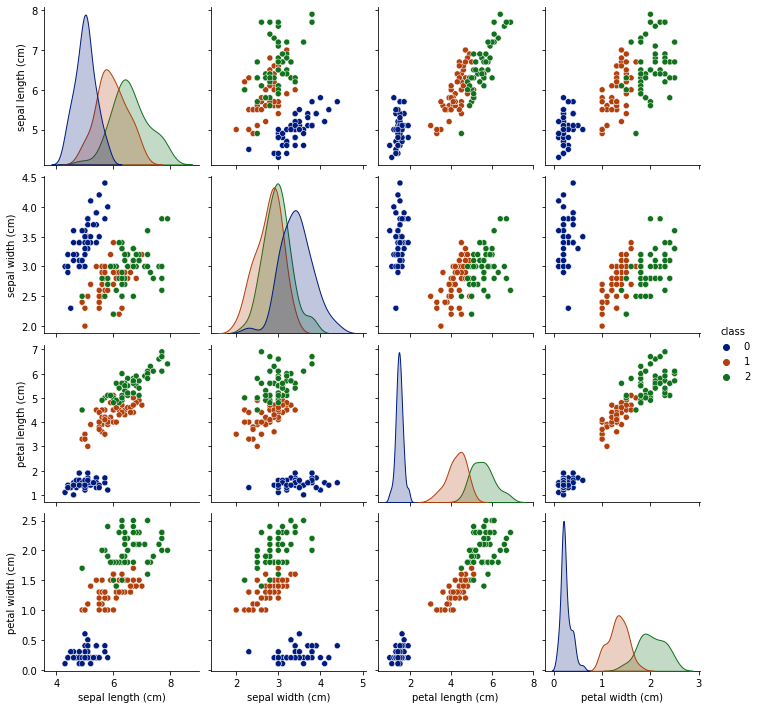

In [ ]:
sns.pairplot(data,hue='class',palette='dark')

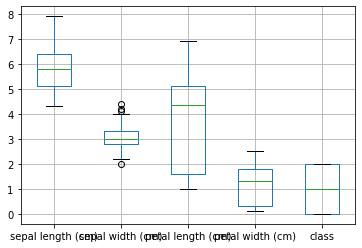

In [ ]:
data.boxplot()

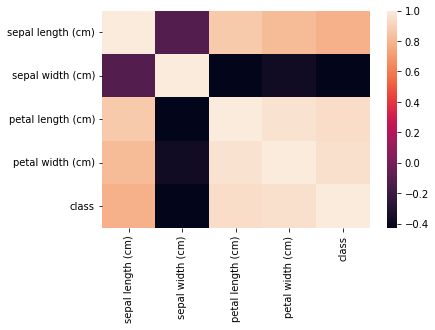

In [ ]:
sns.heatmap(data.corr())

In [ ]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'class'],
      dtype='object')

In [ ]:
x=data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
y=data['class']
    

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)


In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [ ]:
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

In [ ]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)

SVC()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 2, 2, 1, 2, 1, 1, 2, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [ ]:
print("confusion Matrix")
print(confusion_matrix(y_test,y_pred))

confusion Matrix
[[16  0  0]
 [ 0 14  4]
 [ 0  0 11]]


In [ ]:
print("classification Report:")
print(classification_report(y_test,y_pred))

classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.78      0.88        18
           2       0.73      1.00      0.85        11

    accuracy                           0.91        45
   macro avg       0.91      0.93      0.91        45
weighted avg       0.93      0.91      0.91        45



In [ ]:
print("Accuracy Score:")
print(accuracy_score(y_test,y_pred))

Accuracy Score:
0.9111111111111111
